# Analysis of the dynamics of metabolic network during *Drosophila* embryogenesis via Dynamic Flux Activity (DFA)

1. [Overview](#overview)
2. [Slope verification for mean value of metabolomics](slope-verification-for-mean-value-of-metabolomics)
3. [DFA with mean values of metabolomics](dfa-with-mean-value-of-metabolomics)
4. [Slope verification for mean value of metabolomics](slope-verification-for-mean-value-of-metabolomics)
5. [DFA with raw data of metabolomics](dfa-with-mean-value-of-metabolomics)

## Overview
Applying script `fly_timeDFA.m`, we got DFA results in which we have growth-rate predictions for each reaction/gene deletions. Considering that the oxygen concentration is crucial for embryo metabolism, we also depleted oxygen level and tested the effects via DFA.

Before we start analysis, we here imported the essential packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cobra
from MatplotProp import CanvasStyle, PltProps
PltProps()

## DFA with mean values of metabolomics
Adapted from the G3 and the PLOS one paper, two tables organized in `FlyData.xlsx` spreadsheet have 55 and 30ish metabolites matched the ones in the network model. We seperated the data into two parts, early and late stage, by cutting the time on 11th and 9th hours respectively. Now, we have data with prefix `[hypoxia]` in `.\DFA_data` folder.

In [14]:
# Check slopes from DFA.
e_slope = pd.read_csv('DFA_data/[hypoxia]Fly_early_slope.csv')
l_slope = pd.read_csv('DFA_data/[hypoxia]Fly_late_slope.csv')

# Create an output container.
hp = np.zeros((len(e_slope), 2))

# Plot settings.
ylabel = []
xlabel = ['Early stage', 'Late stage']
for i in range(len(e_slope)):
    met = str(e_slope.iloc[i]).split(';')[21][9:]
    ylabel.append(met)
    hp[i, 0] = float(str(e_slope.iloc[i]).split(';')[22].split('...')[0])
    hp[i, 1] = float(str(l_slope.iloc[i]).split(';')[22].split('...')[0])

# Create the dataframe by feeding data.
df = pd.DataFrame(hp[1:, :])
df.columns = xlabel
df.index = ylabel[1:]
print("The first 5 rows of the dataframe:")
display(df.head())

The first 5 rows of the dataframe:


,Early stage,Late stage
L-Lysine,0.001816,0.189503
L-Valine,0.014140,-0.000648
L-Leucine,0.037639,0.006539
L-Isoleucine,0.024323,0.003073
L-Threonine,0.003853,0.000114


Text(0.5, 1, 'DFA slopes based on the G3 dataset')

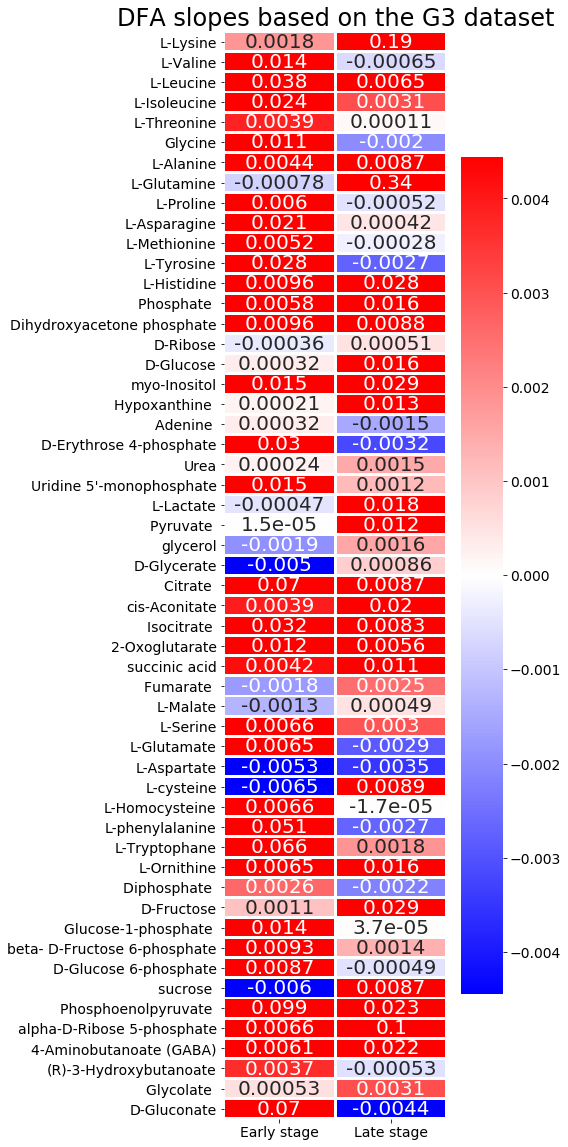

In [15]:
fig = plt.figure(figsize=(5,20))
ax = fig.add_subplot(111)
bound = np.min([np.max(df), np.abs(np.min(df))])
hp = sns.heatmap(df, ax=ax, linewidth=2, cmap='bwr',
                 annot=True, vmin=-bound, vmax=bound)
ax.set_title('DFA slopes based on the G3 dataset', fontsize=24)

In [16]:
tmp = pd.read_excel('FlyData.xlsx', sheet_name='G3_BestMatch')
ind = 4+np.arange(12)*3
D = tmp.iloc[:, ind]
mets = tmp.iloc[:, 0]
mean_g3 = pd.DataFrame(data=D)
mean_g3.columns = tmp.columns[ind]
mean_g3.index = mets
print("The first 5 rows of the mean value dataframe:")
display(mean_g3.head())

The first 5 rows of the mean value dataframe:


,0,2,4,6,8,10,12,14,16,18,20,22
metabolite,,,,,,,,,,,,
L-Lysine,535.139805,410.830631,405.094350,406.393345,522.280411,579.084952,460.862110,538.657617,507.369717,700.804373,743.831103,835.512122
L-Valine,96.933384,101.253871,72.650349,109.290041,150.784462,201.434574,196.599657,247.708152,216.488890,172.312076,196.787691,214.836940
L-Leucine,21.564333,16.122665,9.498365,18.984776,34.467558,56.566663,50.951848,54.685579,50.558308,54.899755,64.788672,68.936084
L-Isoleucine,14.318695,18.616930,14.899178,20.185176,28.317575,43.167417,40.419799,46.334067,47.206807,43.685334,50.633392,51.732594
L-Threonine,158.376775,128.864247,128.403954,122.952080,171.636952,202.622046,181.165854,216.470973,215.211443,190.318705,190.169861,205.041805


Text(0.5, 1, 'Mean of the metabolites by time based on the G3 dataset')

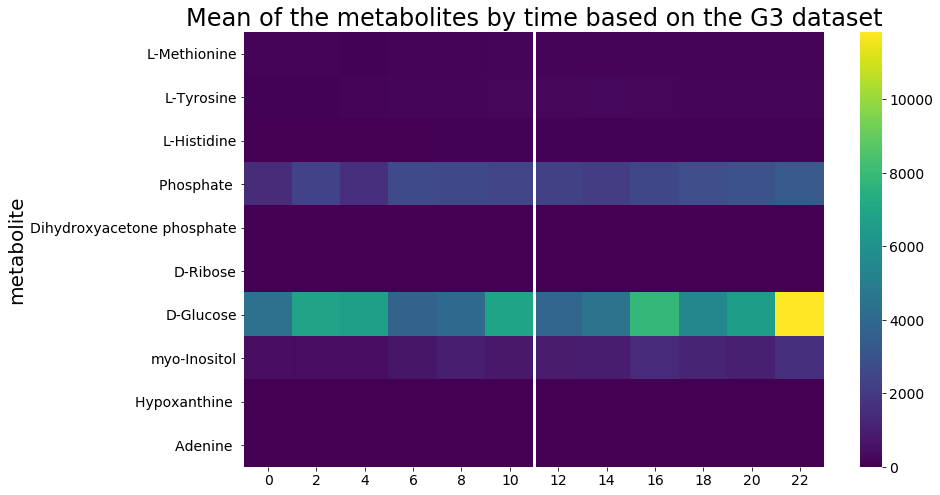

In [35]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
sns.heatmap(mean_g3.iloc[10:20,:], ax=ax, linewidth=0, cmap='viridis', annot=False,)
ax.axvline([6], ymin=0, ymax=1, color='w')
ax.set_title('Mean of the metabolites by time based on the G3 dataset', fontsize=24)

In [18]:
tmp_slope = np.zeros((len(mets), 2))
for i in range(len(mets)):
    p1 = np.polyfit(mean_g3.columns[:6].to_numpy().astype('float'), mean_g3.iloc[i,:6], 1)
    p2 = np.polyfit(mean_g3.columns[6:].to_numpy().astype('float'), mean_g3.iloc[i,6:], 1)
    if p1[1]<0:
        print('neg intercept')
        p1[1] = -p1[1]
    if p2[1]<0:
        print('neg intercept')
        p2[1] = -p2[1]
    tmp_slope[i, 0] = p1[0]/p1[1]
    tmp_slope[i, 1] = p2[0]/p2[1]
mean_slope = pd.DataFrame(tmp_slope)
mean_slope.columns = ['Early stage', 'Late stage']
mean_slope.index = mets
display(mean_slope.head())

neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept
neg intercept


,Early stage,Late stage
metabolite,,
L-Lysine,0.018164,1.895030
L-Valine,0.141396,-0.006480
L-Leucine,0.376395,0.065386
L-Isoleucine,0.243235,0.030730
L-Threonine,0.038534,0.001136


Text(0.5, 1, 'Polyfit slopes by stages based on the G3 dataset')

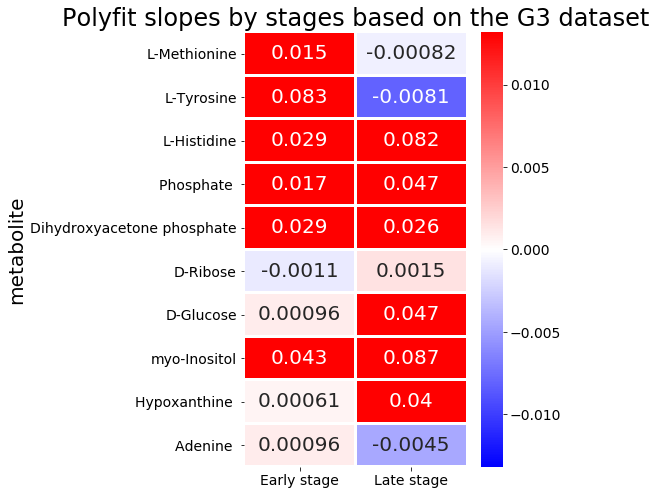

In [37]:
fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)
bound = np.min([np.max(mean_slope), np.abs(np.min(mean_slope))])
sns.heatmap(mean_slope.iloc[10:20,:], ax=ax, linewidth=2, cmap='bwr',
                 annot=True, vmin=-bound, vmax=bound)
ax.set_title('Polyfit slopes by stages based on the G3 dataset', fontsize=24)

Text(0.5, 1, 'Ratio of slopes by stages based on the G3 dataset')

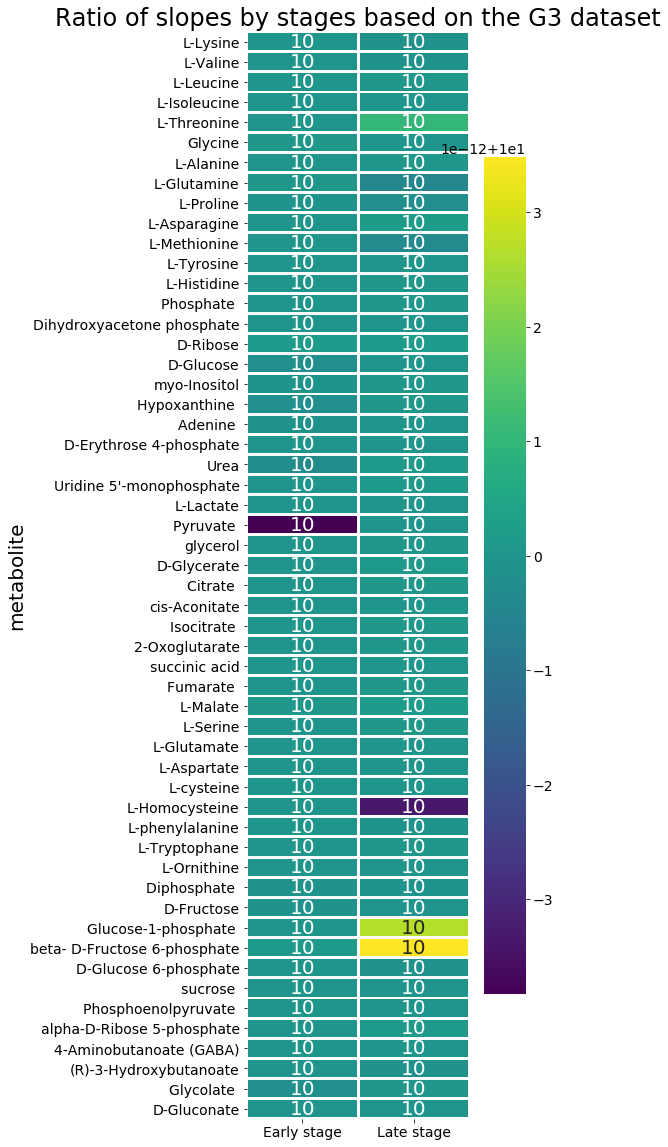

In [20]:
diff_df = mean_slope/df
fig = plt.figure(figsize=(5,20))
ax = fig.add_subplot(111)
bound = np.min([np.max(diff_df), np.abs(np.min(diff_df))])
sns.heatmap(diff_df, ax=ax, linewidth=2, cmap='viridis',
                 annot=True)
ax.set_title('Ratio of slopes by stages based on the G3 dataset', fontsize=24)

Text(0.5, 1, 'Difference of slopes by stages based on the G3 dataset')

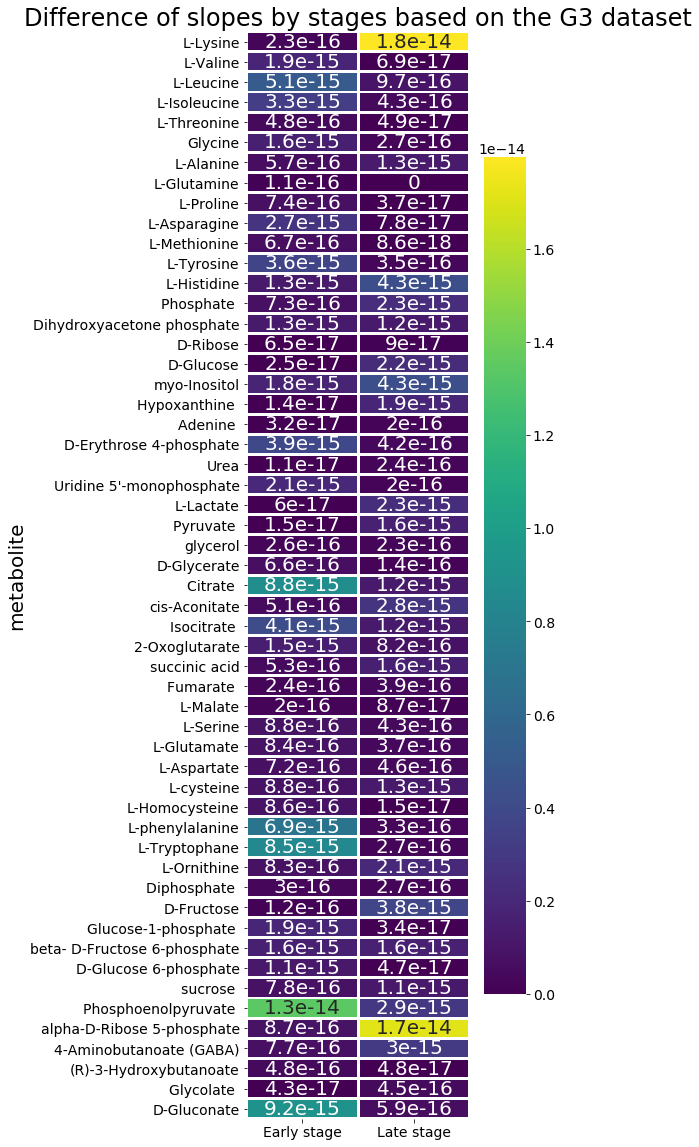

In [21]:
norm1 = np.max([np.max(df), np.abs(np.min(df))])
df = df/norm1
norm2 = np.max([np.max(mean_slope), np.abs(np.min(mean_slope))])
mean_slope = mean_slope/norm2

diff_df = np.abs(mean_slope-df)
fig = plt.figure(figsize=(5,20))
ax = fig.add_subplot(111)
bound = np.min([np.max(diff_df), np.abs(np.min(diff_df))])
sns.heatmap(diff_df, ax=ax, linewidth=2, cmap='viridis',
                 annot=True)
ax.set_title('Difference of slopes by stages based on the G3 dataset', fontsize=24)

In [22]:
data = pd.read_excel('fly_slope.xlsx', sheet_name='slope-o21')
data.head()

,mets,hr4,hr6,hr8,hr10,hr12,hr14,hr16,hr18,hr20,hr22,hr24
0,L-Lysine,-0.094251,-0.006783,0.001620,1.014890,0.119323,-0.045882,0.464517,-0.019828,0.078407,0.079531,0.173179
1,L-Valine,0.023524,-0.090314,0.490633,0.365961,0.247245,-0.010532,0.158529,-0.031369,-0.035971,0.169282,4.861565
2,L-Leucine,-0.100899,-0.112707,0.250220,0.180224,0.145340,-0.031102,0.075000,-0.023585,0.192308,0.112447,0.109070
3,L-Isoleucine,0.212932,-0.071311,2.780731,0.328500,0.161834,-0.022918,3.385285,0.011071,-0.022236,0.134925,0.014027
4,L-Threonine,-0.078502,-0.001816,-0.018826,0.338816,0.921768,-0.032389,0.267359,-0.002775,-0.028338,-0.000379,0.279688


,hr4,hr6,hr8,hr10,hr12,hr14,hr16,hr18,hr20,hr22,hr24
mets,,,,,,,,,,,
L-Lysine,-0.094251,-0.006783,0.001620,1.014890,0.119323,-0.045882,0.464517,-0.019828,0.078407,0.079531,0.173179
L-Valine,0.023524,-0.090314,0.490633,0.365961,0.247245,-0.010532,0.158529,-0.031369,-0.035971,0.169282,4.861565
L-Leucine,-0.100899,-0.112707,0.250220,0.180224,0.145340,-0.031102,0.075000,-0.023585,0.192308,0.112447,0.109070
L-Isoleucine,0.212932,-0.071311,2.780731,0.328500,0.161834,-0.022918,3.385285,0.011071,-0.022236,0.134925,0.014027
L-Threonine,-0.078502,-0.001816,-0.018826,0.338816,0.921768,-0.032389,0.267359,-0.002775,-0.028338,-0.000379,0.279688


Text(0.5, 1, 'DFA slopes by time based on the G3 dataset')

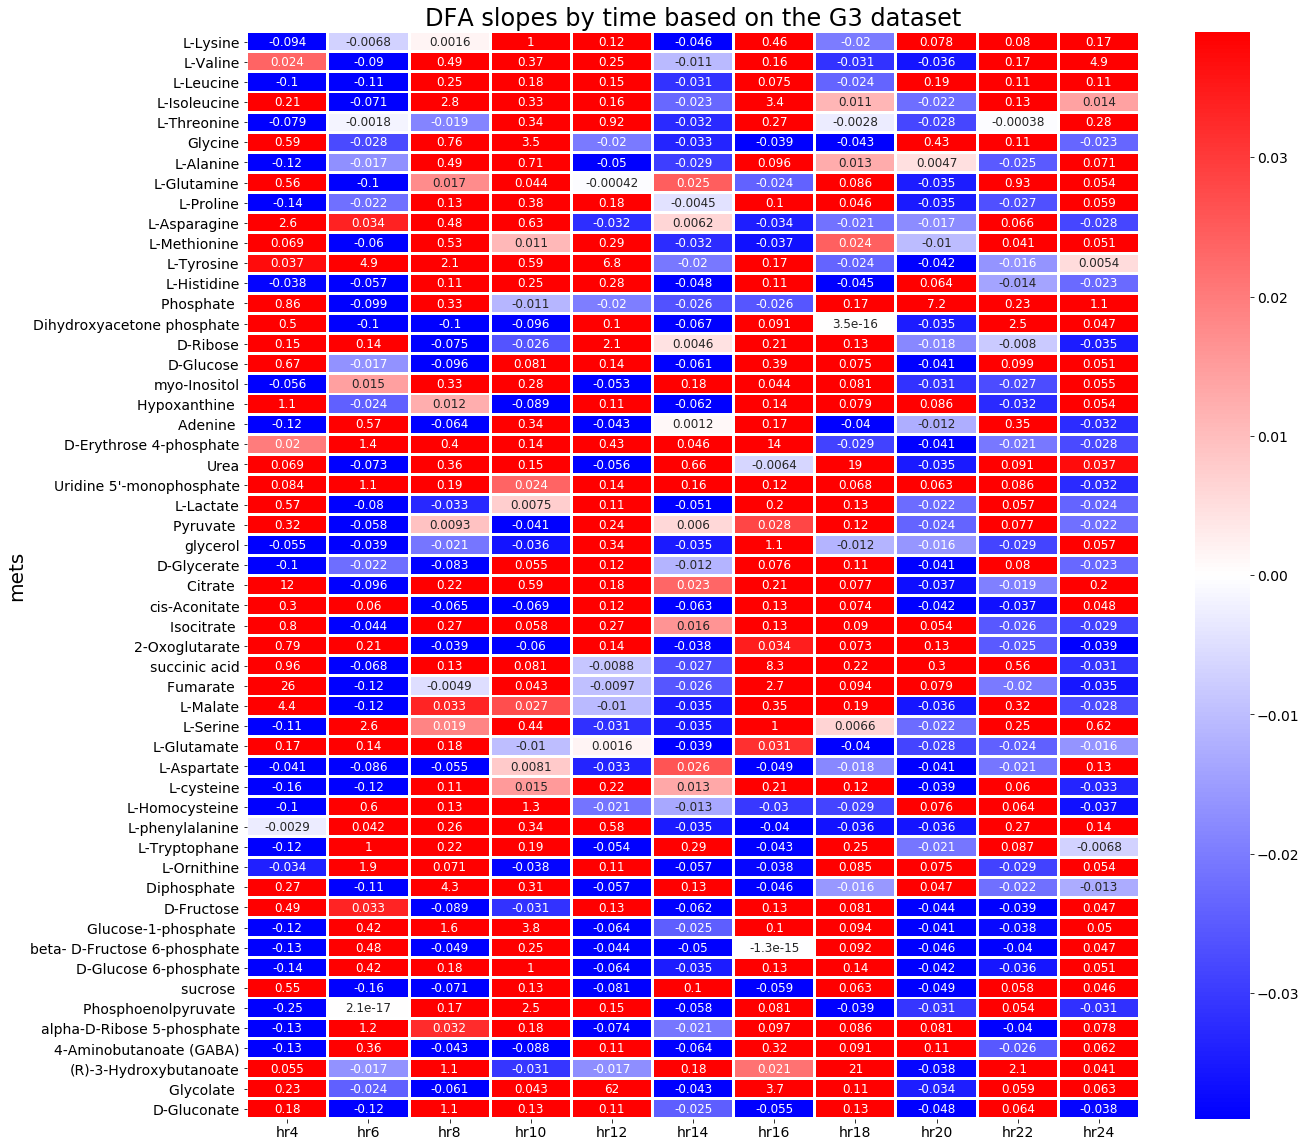

In [23]:
D = data.iloc[:, 1:]
D.index = data['mets']
display(D.head())
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
bound = np.min([np.max(D), np.abs(np.min(D))])
sns.heatmap(D, ax=ax, linewidth=2, cmap='bwr',
                 annot=True, vmin=-bound, vmax=bound, annot_kws={"fontsize":12})
ax.set_title('DFA slopes by time based on the G3 dataset', fontsize=24)

In [24]:
start_p = np.array([4, 10, 17, 23, 29, 36, 43, 50, 57, 64, 70]);
end_p = np.array([16, 22, 28, 35, 42, 49, 56, 63, 69, 76, 84]);
start_p = start_p-4
end_p = end_p-4

In [25]:
raw_data = pd.read_excel('FlyData.xlsx',
                         sheet_name='G3_raw')
raw_D = raw_data.iloc[:, 4:]
raw_D.index = raw_data['metabolite']
ys = [np.floor(float(ele)) for ele in raw_D.columns]
slope = np.zeros((len(raw_D), D.shape[1]))
for i in range(len(start_p)):
    print(ys[start_p[i]:end_p[i]+1])
    for j in range(len(raw_D)):
        x = np.array(ys[start_p[i]:end_p[i]+1])
        y = raw_D.iloc[j, start_p[i]:end_p[i]+1].to_numpy()+0.00001
        z = np.polyfit(x, y, 1)
        slope[j, i] = z[0]/np.abs(z[1])

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0]
[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0]
[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]
[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]


Text(0.5, 1, 'Polyfit slopes by time based on the G3 dataset')

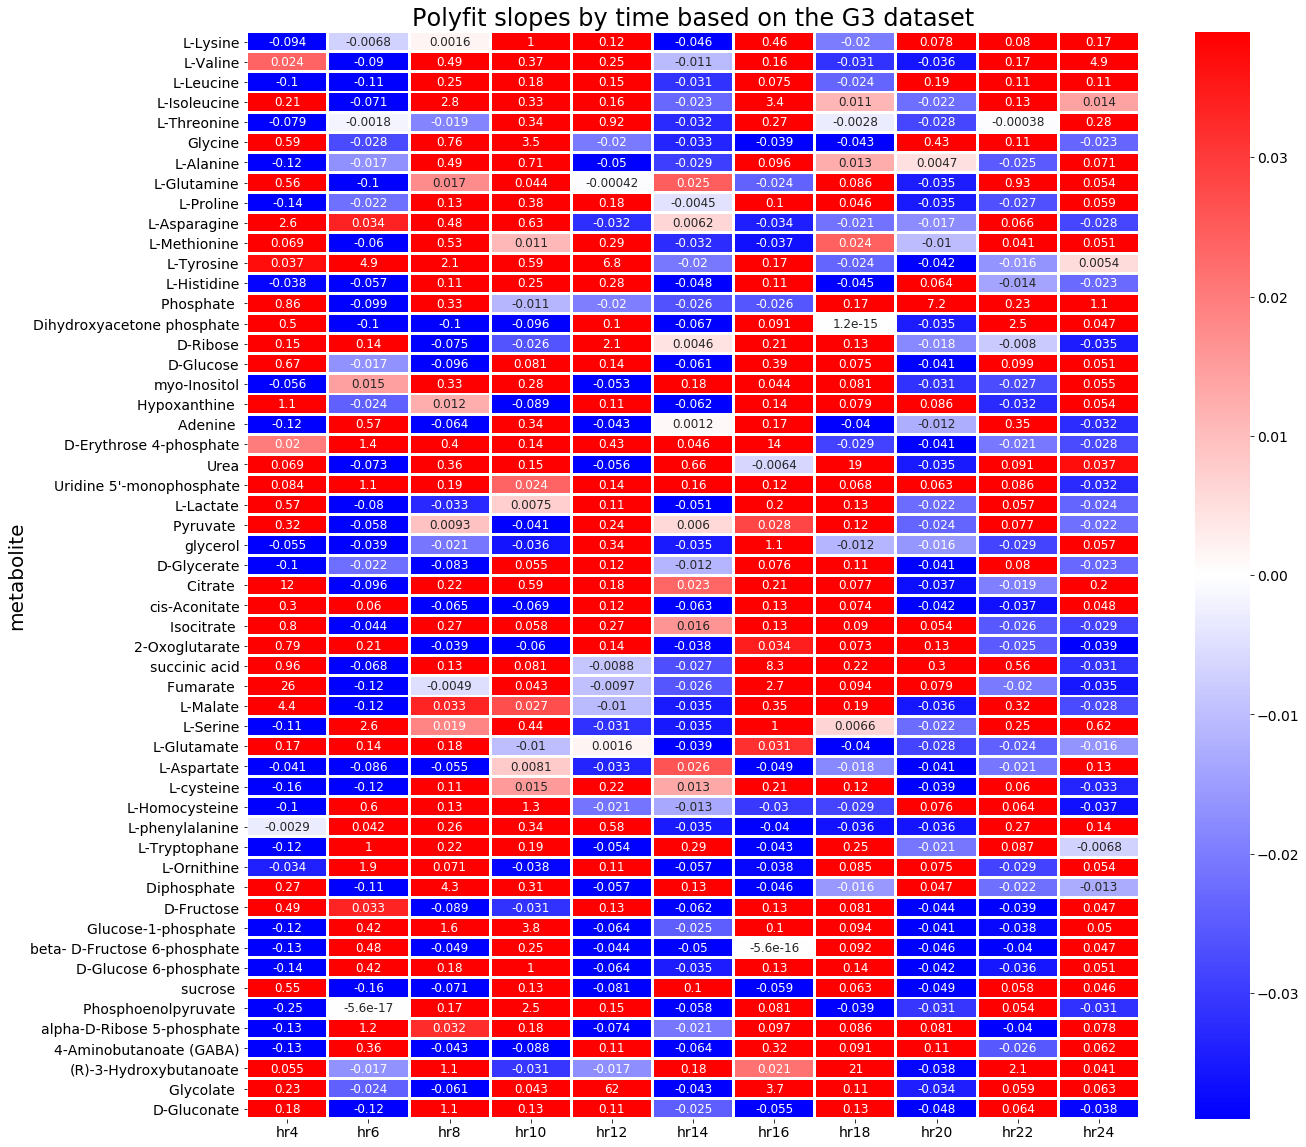

In [26]:
slope_df = pd.DataFrame(slope)
slope_df.columns = D.columns
slope_df.index = raw_D.index

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
bound = np.min([np.max(slope_df), np.abs(np.min(slope_df))])
sns.heatmap(slope_df, ax=ax, linewidth=2, cmap='bwr',
                 annot=True, vmin=-bound, vmax=bound, annot_kws={"fontsize":12})
ax.set_title('Polyfit slopes by time based on the G3 dataset', fontsize=24)

Text(0.5, 1, 'Ratio of slopes by stages based on the G3 dataset')

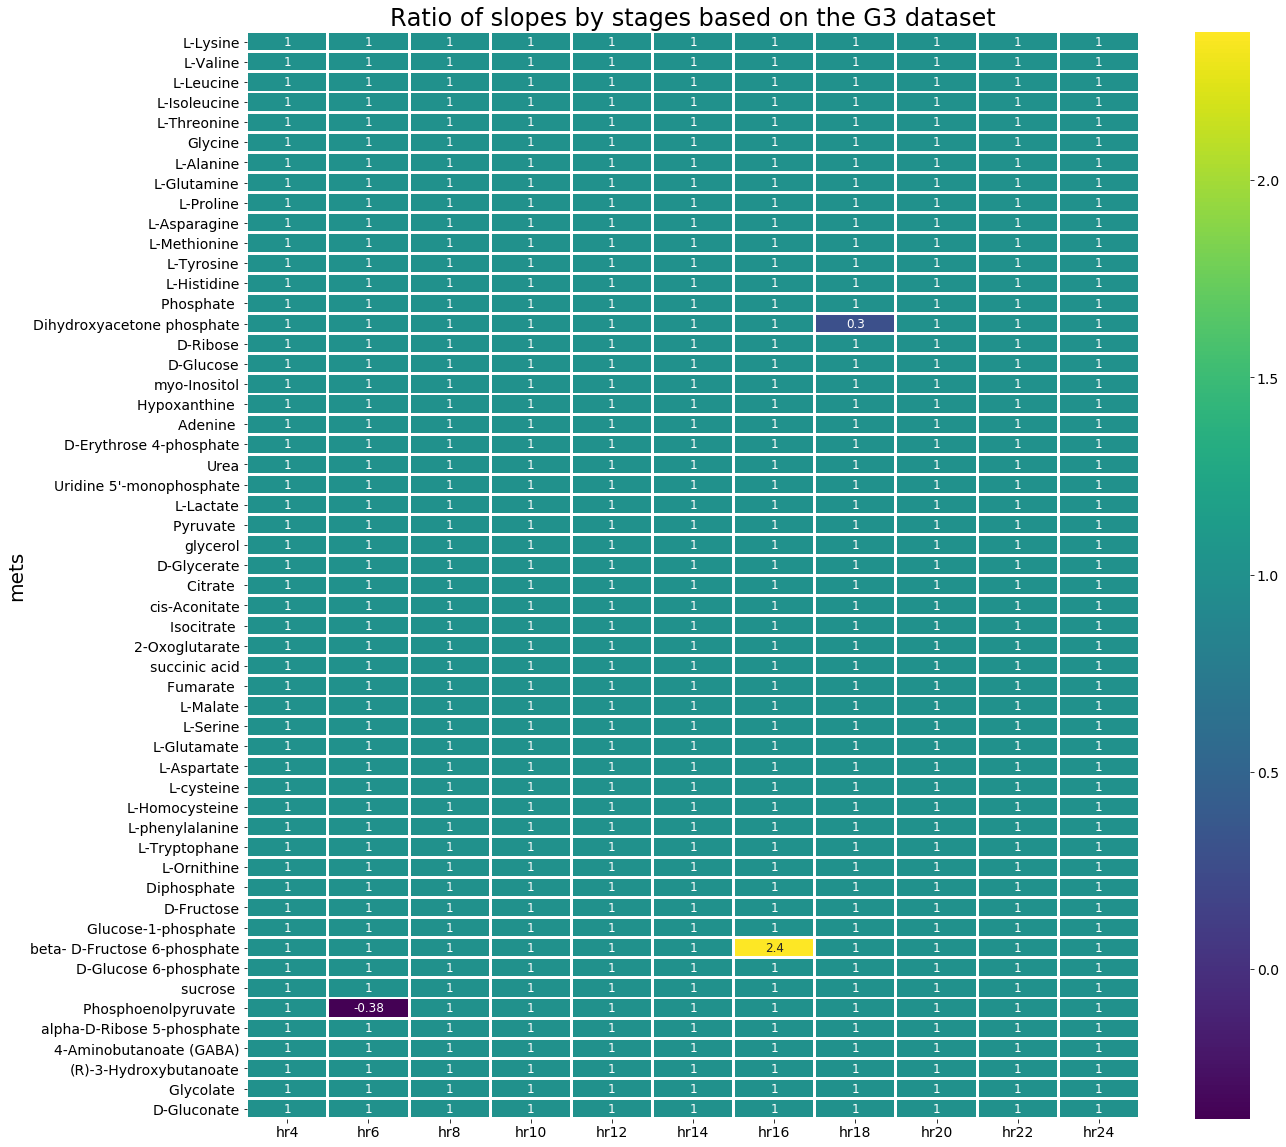

In [28]:
diff_df = D/slope_df
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
bound = np.min([np.max(diff_df), np.max(np.abs(diff_df))])
sns.heatmap(diff_df, ax=ax, linewidth=2, cmap='viridis',
                 annot=True, annot_kws={"fontsize":12})
ax.set_title('Ratio of slopes by stages based on the G3 dataset', fontsize=24)

Text(0.5, 1, 'Difference of slopes by stages based on the G3 dataset')

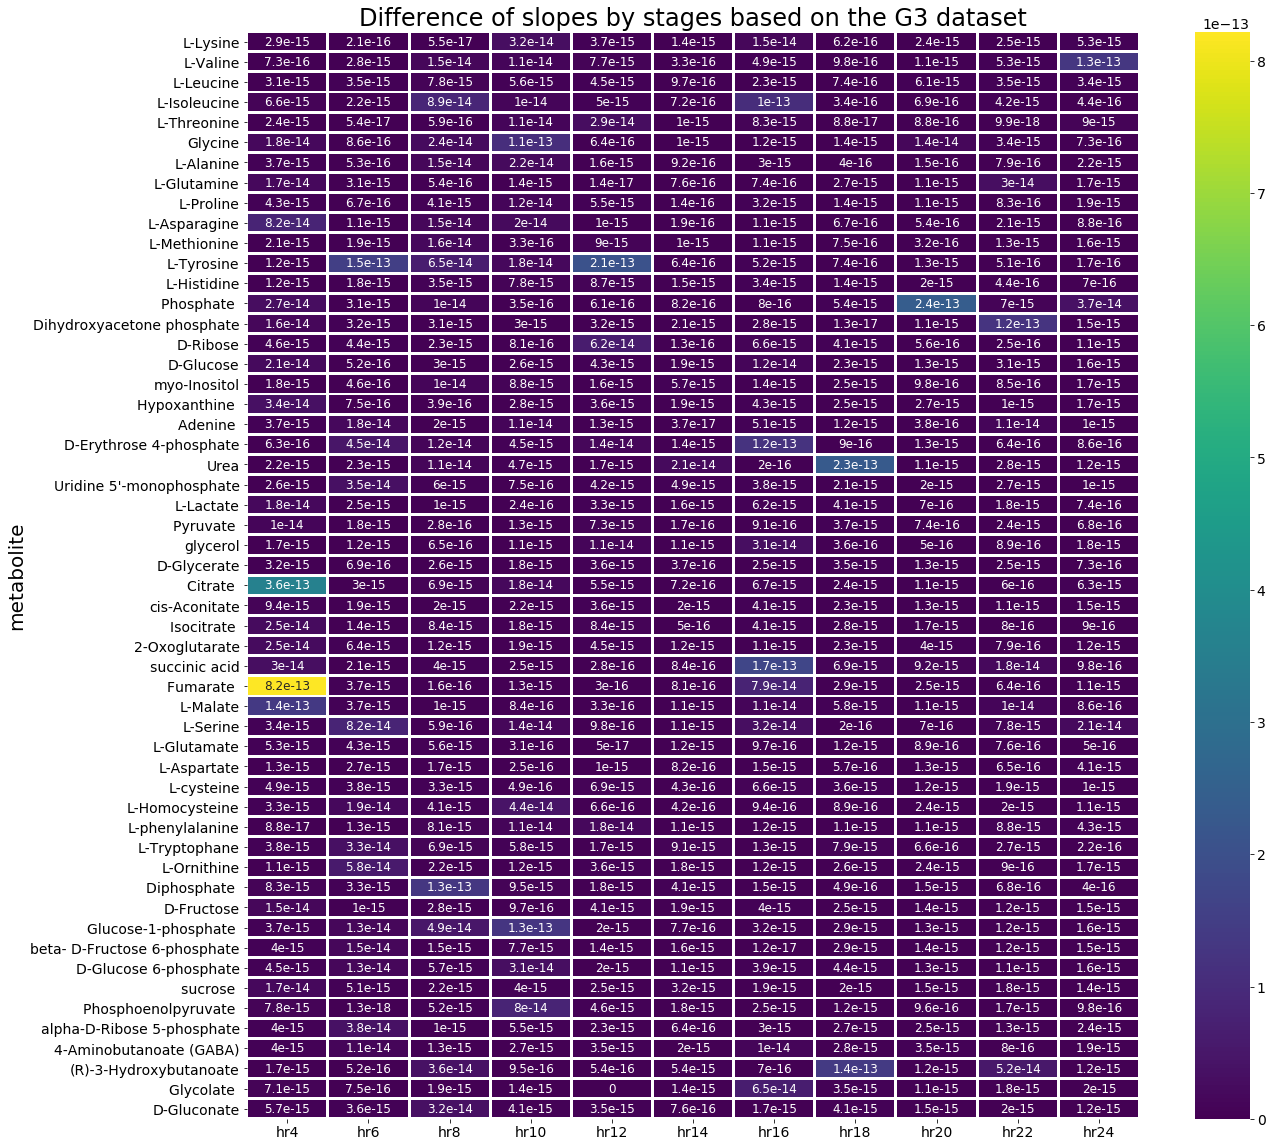

In [85]:
norm1 = np.max([np.max(D), np.abs(np.min(D))])
df1 = D/norm1
norm2 = np.max([np.max(slope_df), np.abs(np.min(slope_df))])
df2 = slope_df/norm2

diff_df = np.abs(df2-df1)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
bound = np.min([np.max(diff_df), np.abs(np.min(diff_df))])
vm = np.min(np.min(diff_df))
sns.heatmap(diff_df, ax=ax, linewidth=2, cmap='viridis',
                 annot=True, annot_kws={"fontsize":12})
ax.set_title('Difference of slopes by stages based on the G3 dataset', fontsize=24)

In [3]:
mets = []
e_v = []
l_v = []
row = 0
for arr1, arr2 in zip(l_slope.values, e_slope.values):
    mets.append(arr1[0].split(';')[0])
    if row==0:
        l_v = np.zeros((len(l_slope)-1, len(arr1[0].split(';')[1:])))
        e_v = np.zeros((len(l_slope)-1, len(arr1[0].split(';')[1:])))
    else:
        l_v[row-1, :] = arr1[0].split(';')[1:]
        e_v[row-1, :] = arr2[0].split(';')[1:]
    row += 1

In [253]:
comp = np.concatenate(([e_v[:, -1]], [l_v[:, -1]]), axis=0)
display(comp.shape)
df = pd.DataFrame(data=comp)
o2 = l_slope.iloc[0].values[0].split(';')[1:]
df.index = xlabel
df.columns = mets[1:]
print(df.columns)

(2, 33)

Index(['L-Alanine', 'L-Asparagine', 'L-Aspartate', 'Citrate ', 'L-Citrulline',
       'D-Fructose', 'Fumarate', 'D-Glucose', 'L-Glutamine', 'Glycine ',
       'L-Histidine', 'Hypoxanthine ', 'Inosine', 'myo-Inositol',
       'L-Isoleucine', 'L-Leucine', 'L-Lysine', 'L-Malate', 'Maltose ',
       'L-Methionine', 'Nicotinamide adenine dinucleotide', 'L-Ornithine',
       'L-phenylalanine', 'Phosphate', 'L-Proline', 'L-Serine',
       'succinic acid', 'L-Threonine', 'Trehalose', 'L-Tryptophane',
       'L-Tyrosine', 'Urea ', 'L-Valine'],
      dtype='object')


,L-Alanine,L-Asparagine,L-Aspartate,Citrate,L-Citrulline,D-Fructose,Fumarate,D-Glucose,L-Glutamine,Glycine,...,Phosphate,L-Proline,L-Serine,succinic acid,L-Threonine,Trehalose,L-Tryptophane,L-Tyrosine,Urea,L-Valine
Early stage,0.000275,0.004696,-0.007918,0.010866,0.009290,-0.004301,0.000985,0.006586,-0.005283,0.008014,...,0.002253,-0.000590,0.002643,0.010236,0.002595,-0.117385,0.012820,0.007206,-0.004473,0.006367
Late stage,-0.020518,-0.000865,-0.004391,0.000987,-0.028604,0.022972,0.000294,-0.019282,0.004896,-0.001308,...,0.001665,0.017894,0.018407,-0.023664,0.008690,-0.001720,-0.002196,-0.001646,-0.002979,0.000128


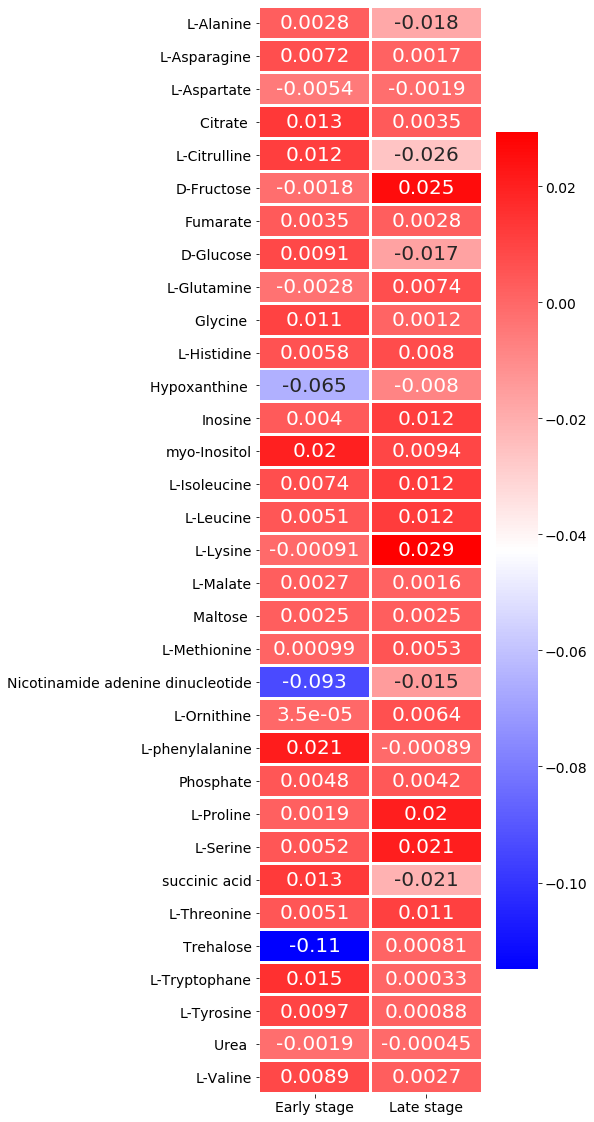

In [254]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# ax.imshow(hp)
# ax.set_xticklabels(xlabel)
# ax.set_xticklabels(ylabel)
df['Maltose '] = 0
# df = df/np.abs(df.iloc[0, :])
fig = plt.figure(figsize=(5,20))
# df[df>0] = 1
# df[df<0] = -1
global_mean = np.mean(np.mean(df))
sns.heatmap((df-global_mean).T, linewidth=2, cmap='bwr', annot=True)

# check if the fluxes match the slopes!
# Increase kappa
# use lower number for normalization like 100 or 10...
display(df)

# Z-score between early and late stage of embryogenesis

In [64]:
from scipy import stats
def diff(a, b):
    # a and b should be matrix.
    out = np.zeros((a.shape[0]-1, a.shape[1]))
    # Normalization
    for i in range(a.shape[1]):
        a[:-1, i] = a[:-1, i]/a[-1, i]
    for i in range(b.shape[1]):
        b[:-1, i] = b[:-1, i]/b[-1, i]
    res = np.subtract(b[:-1, :], a[:-1, :])
#     print(np.nonzero(res), a==b)
    for i in range(a.shape[1]):
        out[:, i] = stats.zscore(res[:, i])
    return out

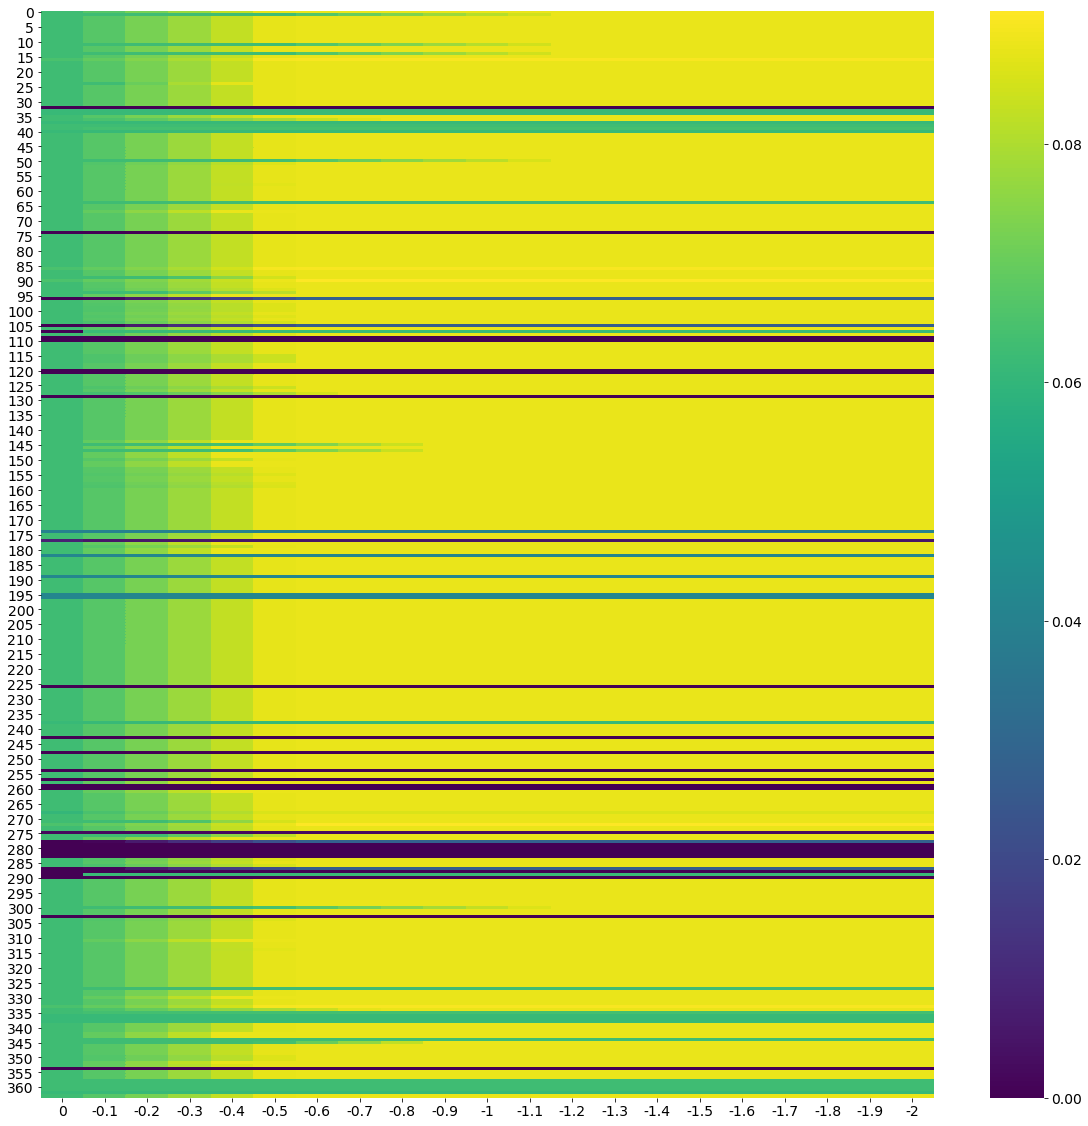

In [81]:
e_DFA = pd.read_csv('[hypoxia]PLOS_FlyEarlyDFA.csv')
l_DFA = pd.read_csv('[hypoxia]PLOS_FlyLateDFA.csv')
# display(str(e_DFA.iloc[-1, :]).split(';'))
# display(str(l_DFA.iloc[-1, :]).split(';'))

rxns = []
res_e = []
with open('[hypoxia]FlyEarlyDFA.csv', 'r') as f:
    for i, r in enumerate(f):
        if i==0:
            pass
            #print('skip', i)
        elif i==1:
            o2_v = [float(v) for v in r.split(';')[1:]]
        else:
            rxns.append(r.split(';')[0].split('"')[1])
            arr = np.array([float(num) for num in r.split(';')[1:]])
            if i==2:
                res_e = arr.copy().reshape(1, len(arr))
            else:
                res_e = np.concatenate((res_e,arr.reshape(1, len(arr))),axis=0)
                
res_l = []
with open('[hypoxia]FlyLateDFA.csv', 'r') as f:
    for i, r in enumerate(f):
        if i==0 or i==1:
            pass
#             print('skip', i)
        else:
            arr = np.array([float(num) for num in r.split(';')[1:]])
            if i==2:
                res_l = arr.copy().reshape(1, len(arr))
            else:
                res_l = np.concatenate((res_l,arr.reshape(1, len(arr))),axis=0)
                
fig = plt.figure(figsize=(20,20))
global_mean = np.mean(np.mean(df))
tmp_df = pd.DataFrame(data=res_l)
tmp_df.columns = o2
# tmp_df.index = mets[1:]
sns.heatmap(tmp_df, linewidth=0, cmap='viridis')

data = diff(res_e, res_l)
df = pd.DataFrame(data)
df.columns = o2_v[:]
df.index = rxns[:-1]
grab = [0, -0.2, -0.4, -0.6, -0.8, -1.0]
# for ele in res_e[:-1, :]:

In [79]:
tmp_df

,0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,...,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.752615,0.792985,0.834607,0.876228,...,0.959472,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.711017,0.711017,0.711017,0.711017,...,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017
360,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.711017,0.711017,0.711017,0.711017,...,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017
361,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.711017,0.711017,0.711017,0.711017,...,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017
362,0.981806,0.917777,0.851837,0.794737,0.744811,0.700787,0.698080,0.698080,0.698080,0.698080,...,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080


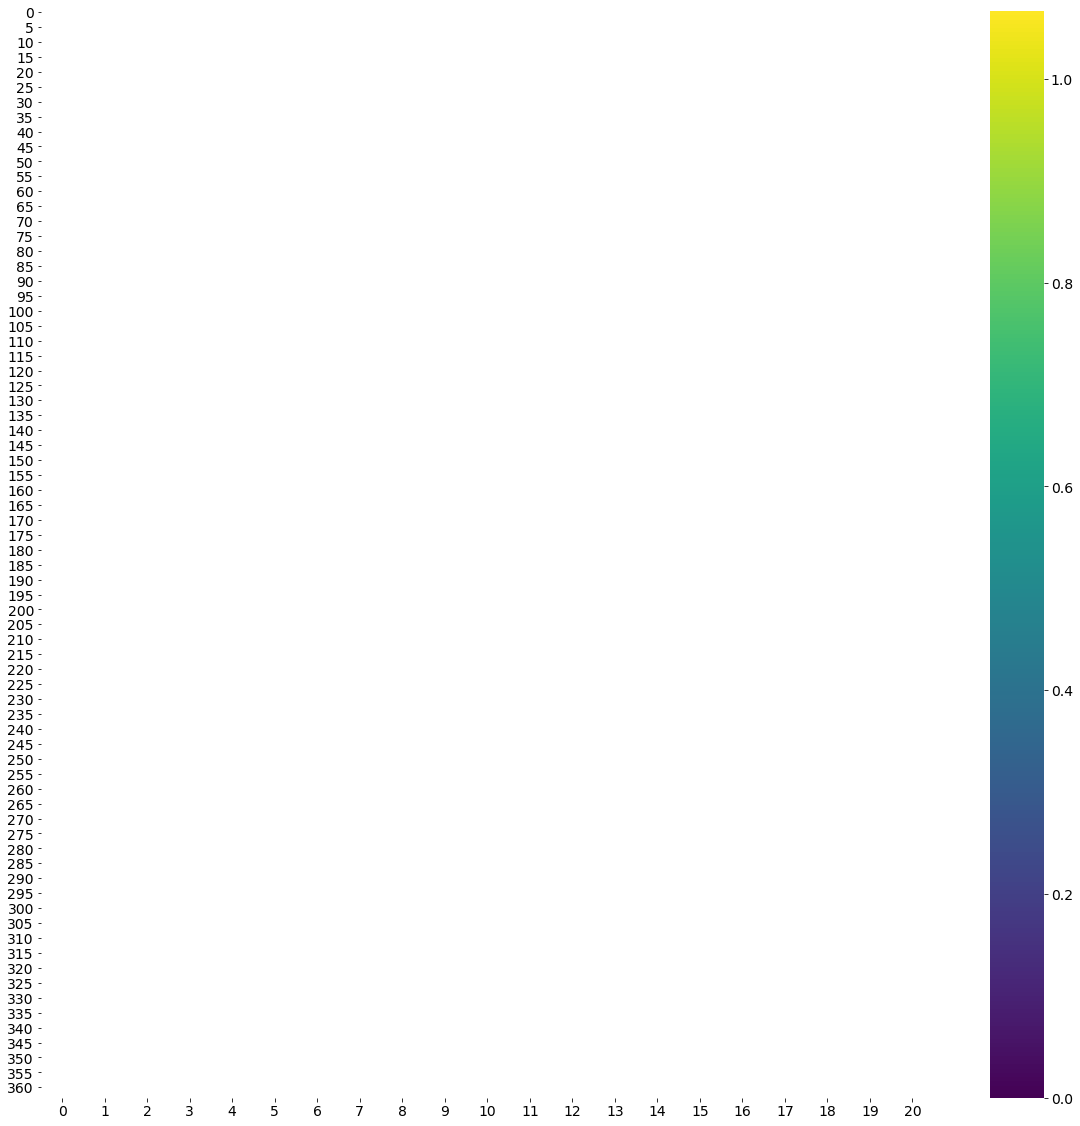

In [8]:
def zscore_plot(df):
    f, ax = plt.subplots(figsize=(10, 6))
    col_name = df.columns
    colors_top = plt.cm.summer(np.linspace(0.95,0.45,len(col_name)))
    colors_last = plt.cm.hsv(np.linspace(0.95,0.45,len(col_name)))
    for i, col in enumerate(col_name):
        if col in grab:
            D = df[col]
            y = np.random.rand(len(D))*0.1
            for j in range(len(D)):
                if 'EX_' not in df.index[j] and 'tm' not in df.index[j]:
                    ax.scatter(D.iloc[j], y[j]+col,
                                    color=colors_last[i],
                                    s=25)
#     ax.set_xlim([-3, 3])
    ax.set_title('Z-score distribution'.format(i))
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Oxygen uptake rate')
    CanvasStyle(ax, square=False)
    plt.show()

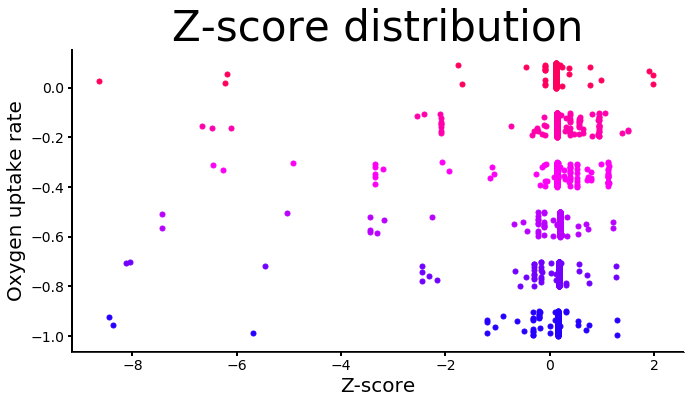

In [9]:
zscore_plot(df)

In [10]:
def zscore_plot(df):
    df_tmp = df[-1.0]
    # Initialize a figure.
    fig, axes = plt.subplots(nrows=2, 
                             ncols=1,
                             sharex=True,
                             sharey=False, 
                             gridspec_kw={'height_ratios': [5, 1]},
                             figsize=(10, 6))
    
    fig.tight_layout()
    D = df_tmp
    colors = plt.cm.rainbow(np.linspace(0,1,len(D)))
    axes[0].hist(D, color='k')
    y = np.random.rand(len(D))*0.1
    for j in range(len(D)):
        axes[1].scatter(D.iloc[j], y[j],
                        color='k',
                        s=25)
        if 'EX_' not in df.index[j] and 'tm' not in df.index[j]:
            if D.iloc[j]>2 or D.iloc[j]<-2:
                axes[1].scatter(D.iloc[j], y[j],
                            color=colors[int(len(D)*np.random.random())],
                            s=30, label=df.index[j])
            
    axes[0].set_title('Z-score distribution'.format(i))
#     axes[1].set_xlabel('Z-score')
#     axes[1].set_ylabel('Oxygen uptake rate')
    axes[1].set_ylim([0, 0.1])
    CanvasStyle(axes[0], square=True)
    CanvasStyle(axes[1], square=True)
    plt.legend(bbox_to_anchor=(1.3,7))
    plt.show()

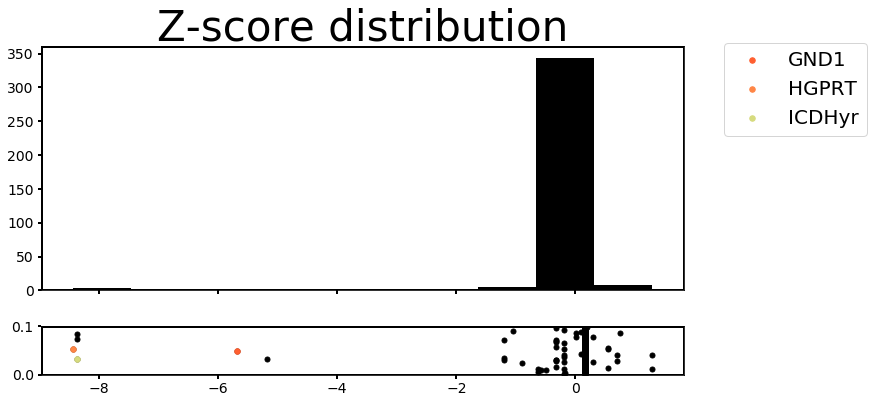

In [11]:
zscore_plot(df)

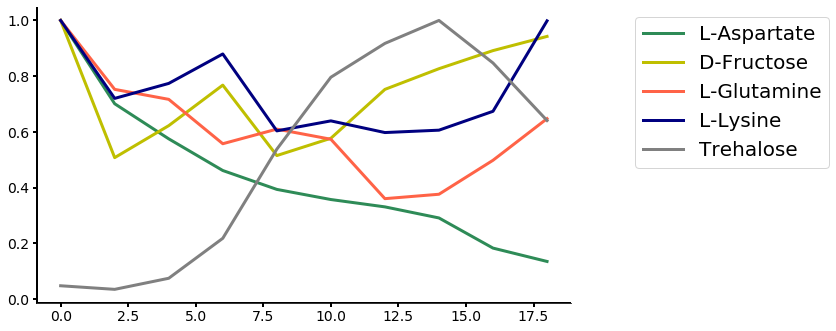

In [256]:
raw = pd.read_excel('FlyData.xlsx', sheet_name='PLOS_BestMatch')
data = raw.iloc[0:, 4:]
mets = raw.iloc[:, 0]

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

colors_top = plt.cm.viridis(np.linspace(0,1,10))
diff_abs = np.zeros(len(mets))
for i, ele in enumerate(mets):
    diff_abs[i] = abs(np.diff(data.iloc[i, :])).sum()
inds = np.argsort(diff_abs)[::-1][:10]
ct = 0
# for i, ele in enumerate(mets):
#     if i in inds:
#         ax.plot(data.iloc[i, :], label=ele, color=colors_top[ct], linewidth=3)
#         ct += 1
#     else:
#         pass
    
    
for i, ele in enumerate(mets):
    if ele == 'L-Glutamine':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='tomato', linewidth=3)
    if ele == 'L-Lysine':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='navy', linewidth=3)
    if ele == 'L-Aspartate':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='seagreen', linewidth=3)
    if ele == 'Trehalose':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='grey', linewidth=3)
    if ele == 'D-Fructose':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='y', linewidth=3)
# ax.plot(data.iloc[8, :], label=ele, color='y', linewidth=3)
# ax.plot(data.iloc[i, :]/max(data.iloc[i, :]), color='white')
plt.legend(bbox_to_anchor=(1.1,1))
plt.tight_layout()
CanvasStyle(ax, square=False)

In [15]:
arr = np.array([1,3,2,4,5])
abs(np.diff(arr)).sum

<function ndarray.sum>

NameError: name 'fly' is not defined